In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('/Users/aayushmishra/Downloads/MF Large Cap.xlsx')

In [3]:
pd.set_option('display.max_columns', None)
df2 = df.copy()
df.head()


,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Month End,Exp. Ratio,Latest Date,Latest NAV(Rs),6 Months,9 Months,1 Year,3 Years,5 Years,10 Years,SINCE INCEPTION,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino,Month End.1
0,Aditya Birla SL Frontline Equity (Trigger Faci...,0,INF209K01KI9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,2023-06-20,371.310,3.8107,5.9523,25.0792,23.8018,11.4157,14.5850,19.0248,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305
1,Aditya Birla SL Frontline Equity Fund(G),103174,INF209K01BR9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,2023-06-20,371.310,3.8107,5.9523,25.0792,23.8018,11.4157,14.5850,18.9594,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305
2,Axis Bluechip Fund-Reg(G),112277,INF846K01164,Active,Large Cap Fund,Equity,Large Cap Fund,33644.250799,202305,1.56,2023-06-20,45.140,2.1036,1.0522,17.7053,16.6589,10.8192,13.8767,11.8457,4.3818,0.9467,1.0408,0.2249,-0.5496,0.4492,202305
3,Bandhan Large Cap Fund-Reg(G),108799,INF194K01516,Active,Large Cap Fund,Equity,Large Cap Fund,1120.615100,202305,2.16,2023-06-20,52.954,5.9249,5.3958,24.9799,20.6454,10.8940,12.2178,10.2756,4.2889,0.9238,1.4320,0.3084,-0.1750,0.6323,202305
4,Bank of India Bluechip Fund-Reg(G),148982,INF761K01FO7,Active,Large Cap Fund,Equity,Large Cap Fund,113.389700,202305,2.46,2023-06-20,11.200,3.2258,3.6078,23.6203,0.0000,0.0000,0.0000,5.9049,4.5393,0.9918,0.0112,0.0024,-0.3444,0.0044,202305


In [4]:
df2.columns


Index(['Scheme Name', 'AMFI Code', 'ISIN Code', 'Status', 'Category_',
       'Asset Type', 'Sub Category', 'AUM (Cr.)', 'Month End', 'Exp. Ratio',
       'Latest Date', 'Latest NAV(Rs)', '6 Months', '9 Months', '1 Year',
       '3 Years', '5 Years', '10 Years', 'SINCE INCEPTION', 'SD',
       'Beta (Correlation)', 'Treynor', 'Sharpe', 'Jensen`s Alpha', 'Sortino',
       'Month End.1'],
      dtype='object')

In [5]:
df2.drop(['Latest Date','Month End.1','Month End'],axis = 1,inplace= True)
df2.head()



,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Exp. Ratio,Latest NAV(Rs),6 Months,9 Months,1 Year,3 Years,5 Years,10 Years,SINCE INCEPTION,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino
0,Aditya Birla SL Frontline Equity (Trigger Faci...,0,INF209K01KI9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,1.69,371.310,3.8107,5.9523,25.0792,23.8018,11.4157,14.5850,19.0248,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745
1,Aditya Birla SL Frontline Equity Fund(G),103174,INF209K01BR9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,1.69,371.310,3.8107,5.9523,25.0792,23.8018,11.4157,14.5850,18.9594,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745
2,Axis Bluechip Fund-Reg(G),112277,INF846K01164,Active,Large Cap Fund,Equity,Large Cap Fund,33644.250799,1.56,45.140,2.1036,1.0522,17.7053,16.6589,10.8192,13.8767,11.8457,4.3818,0.9467,1.0408,0.2249,-0.5496,0.4492
3,Bandhan Large Cap Fund-Reg(G),108799,INF194K01516,Active,Large Cap Fund,Equity,Large Cap Fund,1120.615100,2.16,52.954,5.9249,5.3958,24.9799,20.6454,10.8940,12.2178,10.2756,4.2889,0.9238,1.4320,0.3084,-0.1750,0.6323
4,Bank of India Bluechip Fund-Reg(G),148982,INF761K01FO7,Active,Large Cap Fund,Equity,Large Cap Fund,113.389700,2.46,11.200,3.2258,3.6078,23.6203,0.0000,0.0000,0.0000,5.9049,4.5393,0.9918,0.0112,0.0024,-0.3444,0.0044


In [6]:
columns_to_check = df2.columns[7:]
df2[columns_to_check] = df2[columns_to_check].replace(0, np.nan)
df2[columns_to_check] = df2[columns_to_check].fillna(df2[columns_to_check].mean())
df2[columns_to_check].head()

,AUM (Cr.),Exp. Ratio,Latest NAV(Rs),6 Months,9 Months,1 Year,3 Years,5 Years,10 Years,SINCE INCEPTION,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino
0,22498.061000,1.69,371.310,3.8107,5.9523,25.0792,23.801800,11.415700,14.585000,19.0248,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745
1,22498.061000,1.69,371.310,3.8107,5.9523,25.0792,23.801800,11.415700,14.585000,18.9594,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745
2,33644.250799,1.56,45.140,2.1036,1.0522,17.7053,16.658900,10.819200,13.876700,11.8457,4.3818,0.9467,1.0408,0.2249,-0.5496,0.4492
3,1120.615100,2.16,52.954,5.9249,5.3958,24.9799,20.645400,10.894000,12.217800,10.2756,4.2889,0.9238,1.4320,0.3084,-0.1750,0.6323
4,113.389700,2.46,11.200,3.2258,3.6078,23.6203,21.818655,11.425886,13.807874,5.9049,4.5393,0.9918,0.0112,0.0024,-0.3444,0.0044


In [7]:
dfcol = df2[columns_to_check]
df2[columns_to_check].columns


Index(['AUM (Cr.)', 'Exp. Ratio', 'Latest NAV(Rs)', '6 Months', '9 Months',
       '1 Year', '3 Years', '5 Years', '10 Years', 'SINCE INCEPTION', 'SD',
       'Beta (Correlation)', 'Treynor', 'Sharpe', 'Jensen`s Alpha', 'Sortino'],
      dtype='object')

In [8]:
X = dfcol.drop('6 Months',axis = 1)
Y=dfcol['6 Months']
print(X.shape,Y.shape)

(34, 15) (34,)


In [9]:
scaler_linear = StandardScaler()

X_scaled = scaler_linear.fit_transform(X)


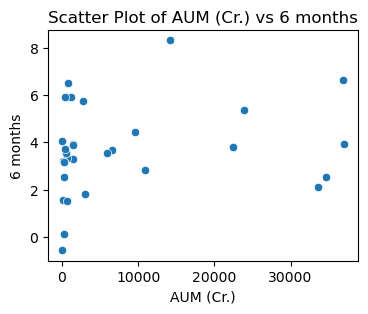

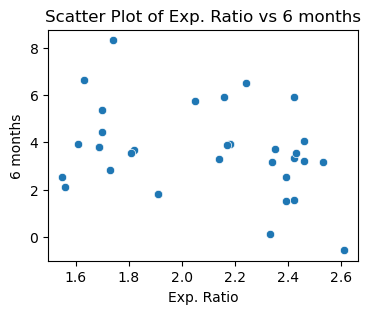

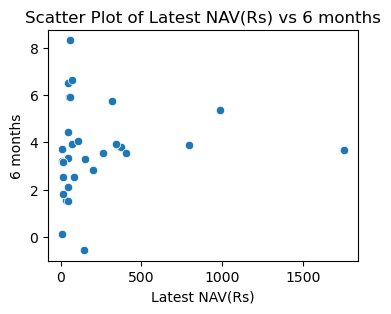

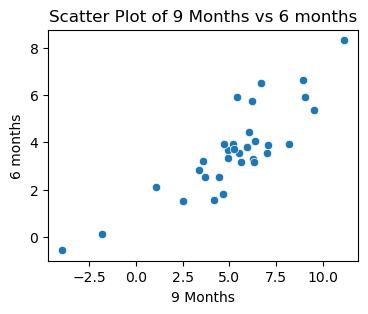

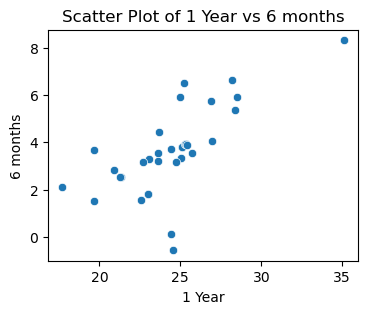

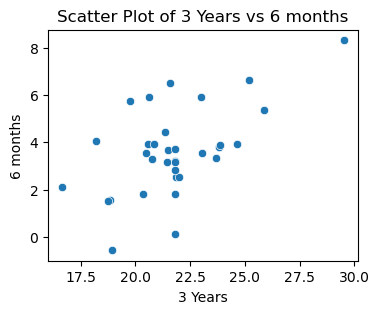

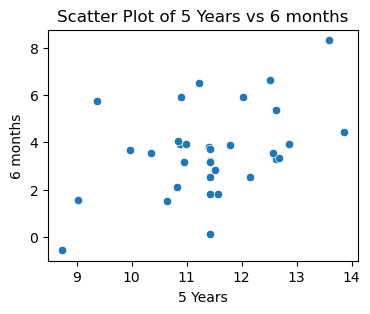

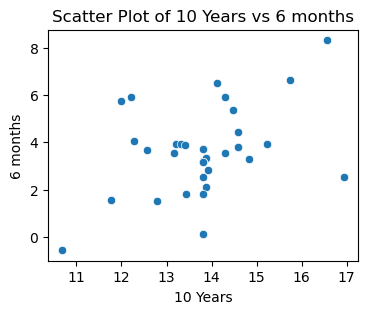

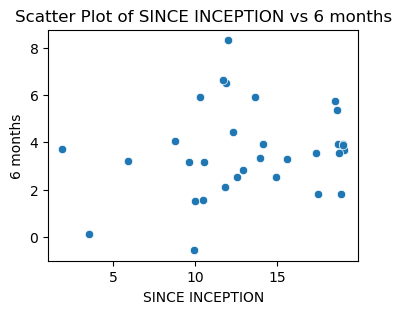

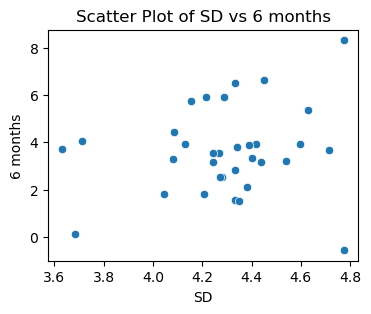

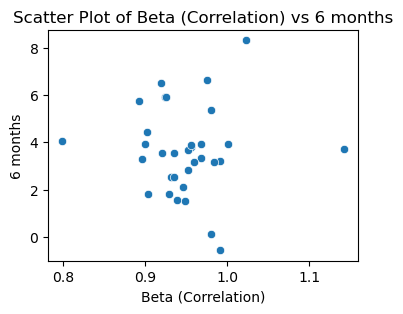

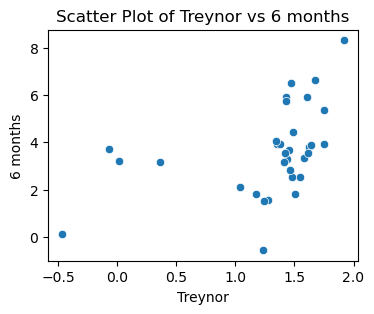

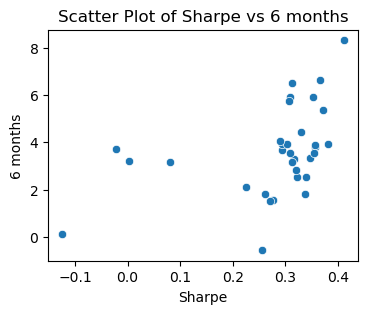

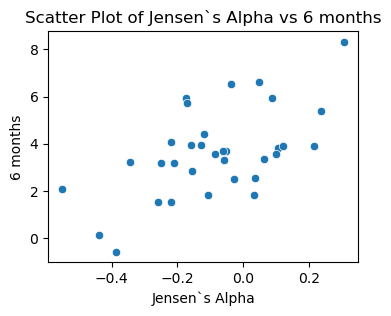

In [10]:
for feature in X.columns[:-1]:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=X[feature], y=Y)
    plt.title(f'Scatter Plot of {feature} vs 6 months')
    plt.xlabel(feature)
    plt.ylabel('6 months')
    plt.show()

In [11]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X_scaled, Y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)
# Delete temporary variables
del x_, y_


print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (20, 15)
the shape of the training set (target) is: (20,)

the shape of the cross validation set (input) is: (7, 15)
the shape of the cross validation set (target) is: (7,)

the shape of the test set (input) is: (7, 15)
the shape of the test set (target) is: (7,)


In [12]:

linear_model = LinearRegression()


linear_model.fit(x_train, y_train )

LinearRegression()

In [117]:

yhat = linear_model.predict(x_train)


print(f"training MSE : {mean_squared_error(y_train, yhat) / 2}")
yhat = linear_model.predict(x_cv)


print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")
yhatt = linear_model.predict(x_test)
print(f"test MSE: {mean_squared_error(y_test, yhatt) / 2}")
print("Feature Weights:",linear_model.coef_)

training MSE : 0.022543800396910584
Cross validation MSE: 17.2249003322785
test MSE: 25.274061136529802
Feature Weights: [  0.30745777  -0.0226821   -1.62295124   4.24621653  -1.59505059
   6.16460514  -0.04202743  -1.46616789   2.11730135   1.19035969
  -2.27629992   5.71744433   2.28089475  -3.15786486 -14.00445112]


MSE for CV >> MSE for training ....Overfitting or High Variance

In [114]:

lasso_reg = Lasso(alpha=0.05)  


lasso_reg.fit(x_train, y_train)


y_pred = lasso_reg.predict(x_train)
print(f"training MSE : {mean_squared_error(y_train, y_pred) / 2}")
y_pred2 = lasso_reg.predict(x_cv)
print(f"cv MSE : {mean_squared_error(y_cv, y_pred2) / 2}")
y_predt = lasso_reg.predict(x_test)
print(f"test MSE : {mean_squared_error(y_test, y_predt) / 2}")
print("Feature Weights:",lasso_reg.coef_)

training MSE : 0.2990226297830475
cv MSE : 0.4513066439895536
test MSE : 0.7776707293964503
Feature Weights: [-0.05497865 -0.023595    0.07683731  0.87995521  0.72591178 -0.
 -0.          0.07556554 -0.          0.12433186 -0.04578975 -0.
 -0.         -0.         -0.17860506]


In [115]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge(alpha=0.9) 


ridge_reg.fit(x_train, y_train)

y_predr = ridge_reg.predict(x_train)
print(f"training MSE : {mean_squared_error(y_train, y_predr) / 2}")
y_predcv = ridge_reg.predict(x_cv)
print(f"cv MSE : {mean_squared_error(y_cv, y_predcv) / 2}")
y_predtt = lasso_reg.predict(x_test)
print(f"test MSE : {mean_squared_error(y_test, y_predtt) / 2}")
print("Feature Weights:",ridge_reg.coef_)

training MSE : 0.19749101810268335
cv MSE : 0.9994249444108544
test MSE : 0.7776707293964503
Feature Weights: [-0.46199019 -0.30472573  0.11455631  0.74200855  0.8384631   0.21754797
 -0.20304076  0.54790982 -0.05115686  0.46613437 -0.50488342 -0.12667169
 -0.32630523 -0.10688225 -0.58438844]


In [60]:
model = Sequential(
    [
       
        Dense(15, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1), name = "L1"),      
        Dense(7, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1), name = "L2"),         
        Dense(3, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1), name = "L3"), 
        Dense(1,activation ='linear',name = 'Last')
        
      

    ], name="NN"
)
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),          
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
    
)

In [61]:
model.fit(
    x_train, y_train,
    epochs=400
)

Epoch 1/400
1/1 [==============================] - 0s 293ms/step - loss: 22.9009
Epoch 2/400
1/1 [==============================] - 0s 2ms/step - loss: 22.4536
Epoch 3/400
1/1 [==============================] - 0s 1ms/step - loss: 22.0996
Epoch 4/400
1/1 [==============================] - 0s 1ms/step - loss: 21.7962
Epoch 5/400
1/1 [==============================] - 0s 1ms/step - loss: 21.5249
Epoch 6/400
1/1 [==============================] - 0s 1ms/step - loss: 21.2786
Epoch 7/400
1/1 [==============================] - 0s 3ms/step - loss: 21.0660
Epoch 8/400
1/1 [==============================] - 0s 2ms/step - loss: 20.8440
Epoch 9/400
1/1 [==============================] - 0s 2ms/step - loss: 20.6251
Epoch 10/400
1/1 [==============================] - 0s 3ms/step - loss: 20.4066
Epoch 11/400
1/1 [==============================] - 0s 2ms/step - loss: 20.1796
Epoch 12/400
1/1 [==============================] - 0s 2ms/step - loss: 19.9567
Epoch 13/400
1/1 [=============================

1/1 [==============================] - 0s 1ms/step - loss: 0.7420
Epoch 207/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7414
Epoch 208/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7404
Epoch 209/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7397
Epoch 210/400
1/1 [==============================] - 0s 2ms/step - loss: 0.7393
Epoch 211/400
1/1 [==============================] - 0s 2ms/step - loss: 0.7386
Epoch 212/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7378
Epoch 213/400
1/1 [==============================] - 0s 2ms/step - loss: 0.7375
Epoch 214/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7370
Epoch 215/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7362
Epoch 216/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7358
Epoch 217/400
1/1 [==============================] - 0s 1ms/step - loss: 0.7353
Epoch 218/400
1/1 [==============================] - 0

In [111]:
print(f"cv error:{model.evaluate(x_cv,y_cv)}")
print(f"test error:{model.evaluate(x_test,y_test)}")

1/1 [==============================] - 0s 49ms/step - loss: 2.7693
cv error:2.769266128540039
1/1 [==============================] - 0s 9ms/step - loss: 4.8549
test error:4.854927062988281


In [120]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', max_depth=2, learning_rate=0.1, n_estimators=20)
xgb_reg.fit(x_train, y_train)


y_predx = xgb_reg.predict(x_train)


e1 = mean_squared_error(y_train, y_predx)
y_predcv = xgb_reg.predict(x_cv)

y_predtest = xgb_reg.predict(x_test)
e2 = mean_squared_error(y_cv, y_predcv)
e3 = mean_squared_error(y_test, y_predtest)
print("train Error:", e1)
print("cv Error:", e2)
print("Test Error:", e3)
print(xgb_reg.feature_importances_)

train Error: 0.7574539361272488
cv Error: 1.4983775476025225
Test Error: 1.7456171094212338
[0.01765932 0.03306764 0.14474729 0.26931527 0.22198714 0.06111732
 0.         0.05680475 0.06467617 0.04723773 0.         0.07134883
 0.         0.01203858 0.        ]


In [121]:
rf_reg = RandomForestRegressor(n_estimators=60, random_state=42) 
rf_reg.fit(x_train, y_train) 

y_predrf = rf_reg.predict(x_train) 

e4 = mean_squared_error(y_train, y_predrf)
y_predrfcv =rf_reg.predict(x_cv) 
e5 = mean_squared_error(y_cv,y_predrfcv)
y_predrftest =rf_reg.predict(x_test) 
e6 = mean_squared_error(y_test,y_predrftest)
print("train Error:",e4 )
print("cv error:",e5)
print("test error:",e6)
print(rf_reg.feature_importances_)

train Error: 0.26006638339486077
cv error: 1.8939319182908745
test error: 1.7219733310769851
[0.00812095 0.01552549 0.03219025 0.41278309 0.28804683 0.02362181
 0.02765602 0.05865255 0.03170159 0.02131949 0.01972381 0.01005491
 0.02242788 0.01234504 0.01583031]
